# Credit Card Fraud Detection
Dados tirados de https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Pela descrição no site, os dados presentes são os PCs de um PCA feito nos dados originais, com excessão das colunas 'Time' e 'Amount'. Além disso, o dataset é extremamente desbalanceado, apenas 0.172% das transações é fraudada.
O objetivo é montar um modelo que seria utilizado para interromper imediatamente as transações caso elas sejam identificadas como fraude. Sendo assim, a precisão do modelo é importante, já que se evitaria de interromper transações legítimas.

###  Primeiro dar uma olhada nos dados:

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Os dados são resultados de um PCA, então não há muito o que fazer em termos de EDA. Mas vamos ver se as colunas apresentam alguma correlação

<AxesSubplot:>

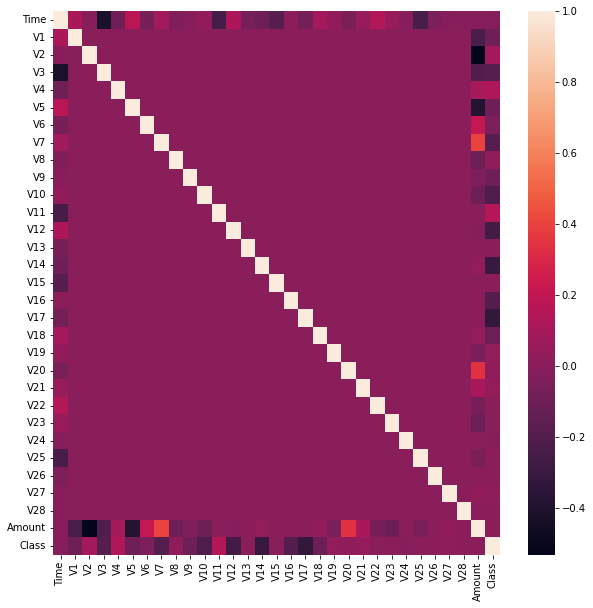

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
correlations = data.corr()
plt.figure(figsize=(10,10))
sn.heatmap(correlations)

Há alguma correlação entre V7 e V20 com a coluna Amount, mas nenhuma correlação forte de nenhuma coluna com a classe.

### Serão testadas duas estratégias: regressão logística e floresta aleatória. O F1-score será usado para avaliar a performance dos modelos
#### Primeiro, separar o dataset:

In [4]:
X = data.drop(['Class'], axis = 1)
y = data['Class']

### Função para ajustar a escala das colunas de tempo e quantia

In [5]:
from sklearn.preprocessing import RobustScaler

def scale_columns(to_scale):
    #scales the 'time' and 'amount' columns of the data
    
    adj = to_scale
    temp1 = RobustScaler().fit_transform(adj[:,0].reshape(-1,1))
    temp2 = RobustScaler().fit_transform(adj[:,29].reshape(-1,1))
    adj[:,0] = temp1[0]
    adj[:,29] = temp2[0]
    return adj

### Funções para plotar resultados:

In [6]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pylab
from matplotlib.lines import Line2D

def plot_confusion_matrix(y_test, y_hat, classes, title = 'Confusion matrix'):
    cm = confusion_matrix(y_test, y_hat)
    plt.figure(figsize = (8,4))
    sn.set(font_scale=1.4)
    sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, vmax = np.sort(np.ravel(cm))[2]) #pega o segundo maior valor porque os dados são desbalanceados
    plt.title(title)
    plt.ylabel('True value')
    plt.xlabel('Predicted value')
    plt.show()
    
    
def plot_roc_curve(y_test, y_prob, title = "Receiver operating characteristic curve"):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="red",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
def plot_c_values_curve(x, y1, y2, title=""):
    maior1 = np.amax(y1)
    maior2 = np.amax(y2)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    line, = ax.plot(x, y1,  color='purple', lw=2)
    line, = ax.plot(x, y2, color='blue', lw=2)
    plt.title(title)
    plt.annotate("balanced max: %f | unbalanced max: %f" % (maior1, maior2), xy=(0.95, 0.95), xycoords='axes fraction')
    plt.xlabel("C values")
    plt.ylabel("average score")
    ax.set_xscale('log')
    legend_elements = [Line2D([0], [0], color='purple',\
                    label='Balanced', markerfacecolor='r',\
                    markersize=10),\
    Line2D([0], [0], color='blue',\
                    label='Unbalanced', markerfacecolor='b',\
                    markersize=10)]
    ax.legend(handles=legend_elements, loc='best')
    pylab.show()

def plot_scores(scores1, scores2, title, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(scores1, color = 'purple', lw =2)
    plt.plot(scores2, color = 'blue', lw =2)
    legend_elements = [Line2D([0], [0], color='purple',\
                        label=label1, markerfacecolor='r',\
                        markersize=10),\
        Line2D([0], [0], color='blue',\
                        label=label2, markerfacecolor='b',\
                        markersize=10)]
    ax.legend(handles=legend_elements, loc='best')
    plt.title(title)
    plt.show()

### Determinar os melhores parâmetros para regressão logística usando F1-score em validação cruzada:
#### Quero testar diferentes valores de C e a regressão balanceada e desbalanceada. Eu imagino que balanceada vai funcionar melhor devido a assimetria dos dados

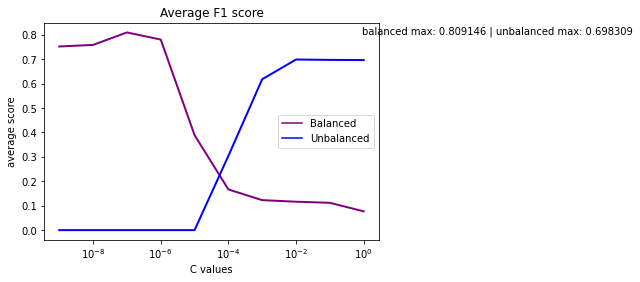

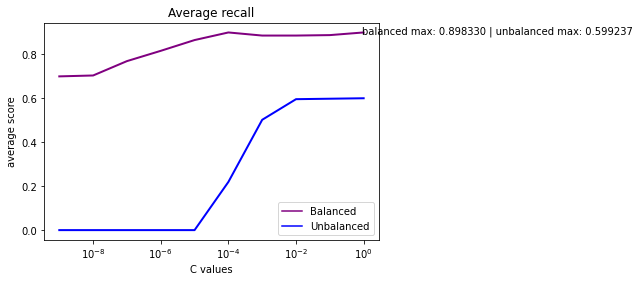

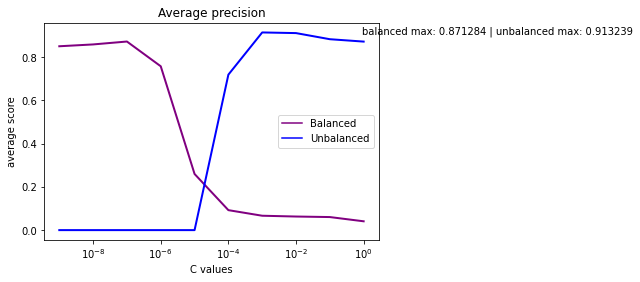

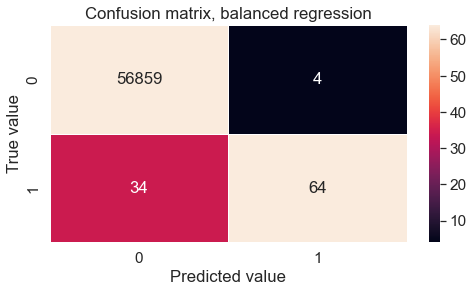

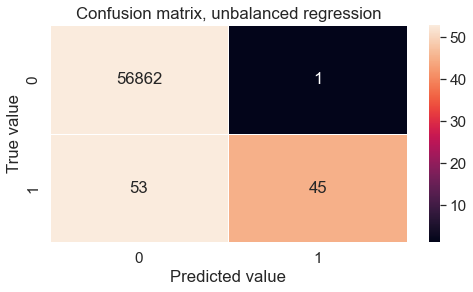

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score

mean_scores = []
mean_unscores = []
mean_recall = []
mean_unrecall = []
mean_prec = []
mean_unprec = []
c_valores = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
m = 0
mun = 0
#para cada possível valor de C fazer validação cruzada e avaliar
for c in c_valores:
    cv = StratifiedKFold(n_splits=5)
    scores = []
    unscores = []
    recall = []
    unrecall = []
    prec = []
    unprec = []
    for i, (train, test) in enumerate(cv.split(X, y)):
        X_train = scale_columns(X.values[train])
        y_train = y.values[train]
        X_test = scale_columns(X.values[test])
        y_test = y.values[test]   
        
        #regressão balanceada:
        regr = LogisticRegression(max_iter = 500, class_weight = 'balanced', C = c)
        regr.fit(X_train, y_train)
        y_hat = regr.predict(X_test)
        scores.append(f1_score(y_test, y_hat, average='binary', zero_division = 0))
        recall.append(recall_score(y_test, y_hat))
        prec.append(precision_score(y_test, y_hat, average='binary', zero_division = 0))
        
        #regressão desbalanceada:
        regrun = LogisticRegression(max_iter = 500, C = c)
        regrun.fit(X_train, y_train)
        y_hat = regrun.predict(X_test)
        unscores.append(f1_score(y_test, y_hat, average='binary', zero_division = 0))
        unrecall.append(recall_score(y_test, y_hat))
        unprec.append(precision_score(y_test, y_hat, average = 'binary', zero_division = 0))
    avg = np.average(scores)
    #salva o modelo com melhor F1-score
    if (avg>m):
        bestregr = regr
        m = avg
    mean_scores.append(avg)
    avg = np.average(unscores)
    if (avg>mun):
        bestregrun = regrun
        mun = avg
    mean_unscores.append(avg)
    mean_recall.append(np.average(recall))
    mean_unrecall.append(np.average(unrecall))
    mean_prec.append(np.average(prec))
    mean_unprec.append(np.average(unprec))
plot_c_values_curve(c_valores, mean_scores, mean_unscores, title = "Average F1 score")
plot_c_values_curve(c_valores, mean_recall, mean_unrecall, title = "Average recall")
plot_c_values_curve(c_valores, mean_prec, mean_unprec, title = "Average precision")
y_hat = bestregr.predict(X_test)
plot_confusion_matrix(y_test, y_hat, classes=[0,1], title = ("Confusion matrix, balanced regression"))
y_hat = bestregrun.predict(X_test)
plot_confusion_matrix(y_test, y_hat, classes=[0,1], title = ("Confusion matrix, unbalanced regression"))

#### Será escolhido o modelo balanceado com C = 1e-7, que obteve os melhores resultados.

### Floresta aleatória:
#### Os modelos de floresta aleatória também podem ser balanceados, vamos novamente testar balanceados e não balanceados. Fora isso eu vou usar os valores default do modelo.

balanced random forest F1 score average: 0.796915
unbalanced random forest F1 score average: 0.816925


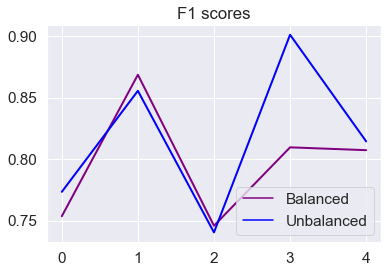

balanced random forest average recall: 0.727376
unbalanced random forest average recall: 0.768110


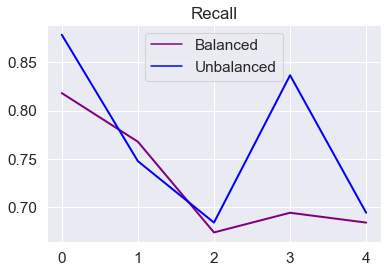

balanced random forest average precision: 0.898088
unbalanced random forest average precision: 0.891881


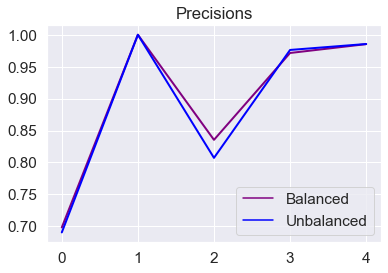

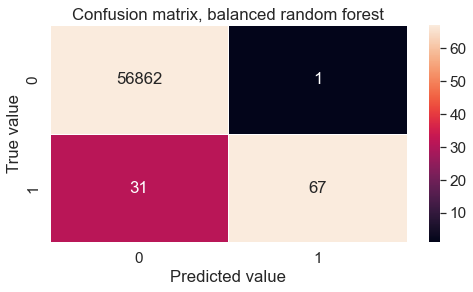

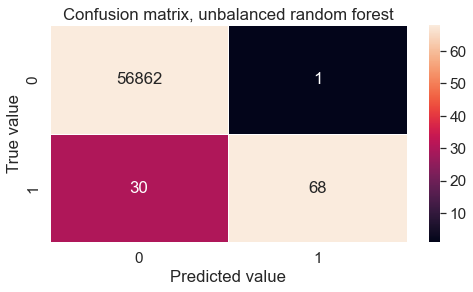

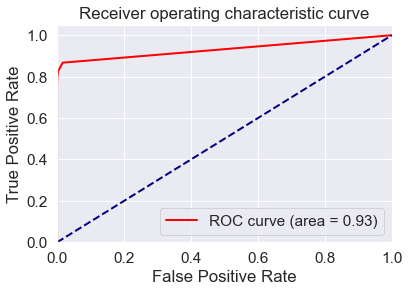

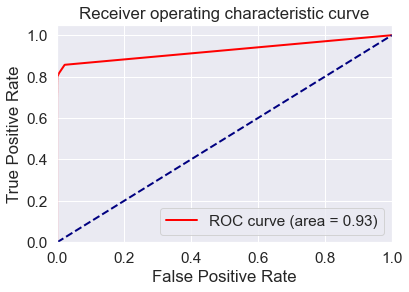

In [8]:
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5)
scores = []
unscores = []
recall = []
unrecall = []
prec = []
unprec = []
for i, (train, test) in enumerate(cv.split(X, y)):
    X_train = scale_columns(X.values[train])
    y_train = y.values[train]
    X_test = scale_columns(X.values[test])
    y_test = y.values[test]
        
    #floresta balanceada:
    flor = RandomForestClassifier(class_weight = 'balanced')
    flor.fit(X_train, y_train)
    y_hat = flor.predict(X_test)
    scores.append(f1_score(y_test, y_hat, average='binary', zero_division = 0))
    recall.append(recall_score(y_test, y_hat))
    prec.append(precision_score(y_test, y_hat, average='binary', zero_division = 0))
    
    #floresta desbalanceada:
    florun = RandomForestClassifier()
    florun.fit(X_train, y_train)
    y_hat = florun.predict(X_test)
    unscores.append(f1_score(y_test, y_hat, average='binary', zero_division = 0))
    unrecall.append(recall_score(y_test, y_hat))
    unprec.append(precision_score(y_test, y_hat, average='binary', zero_division = 0))    

print("balanced random forest F1 score average: %f" % np.average(scores))
print("unbalanced random forest F1 score average: %f" % np.average(unscores))
plot_scores(scores, unscores, 'F1 scores', 'Balanced', 'Unbalanced')

print("balanced random forest average recall: %f" % np.average(recall))
print("unbalanced random forest average recall: %f" % np.average(unrecall))
plot_scores(recall, unrecall, 'Recall', 'Balanced', 'Unbalanced')

print("balanced random forest average precision: %f" % np.average(prec))
print("unbalanced random forest average precision: %f" % np.average(unprec))
plot_scores(prec, unprec, 'Precisions', 'Balanced', 'Unbalanced')

y_hat = flor.predict(X_test)
plot_confusion_matrix(y_test, y_hat, classes=[0,1], title = ("Confusion matrix, balanced random forest"))
y_hat = florun.predict(X_test)
plot_confusion_matrix(y_test, y_hat, classes=[0,1], title = ("Confusion matrix, unbalanced random forest"))

y_prob = flor.predict_proba(X_test)
plot_roc_curve(y_test, y_prob[:,1])
y_prob = florun.predict_proba(X_test)
plot_roc_curve(y_test, y_prob[:,1])

#### A floresta não balanceada foi marginalmente melhor na média, então esse será o modelo escolhido
### Agora para comparar a regressão logística com a floresta aleatória nos mesmos conjunto de teste:

unbalanced random forest F1 score average: 0.817592
balanced regression F1 score average: 0.809146


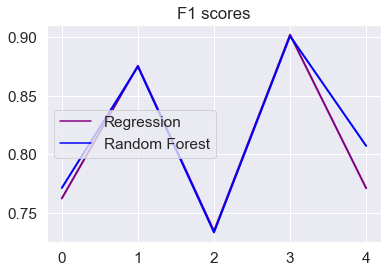

unbalanced random forest average recall: 0.768068
balanced regression average recall: 0.768007


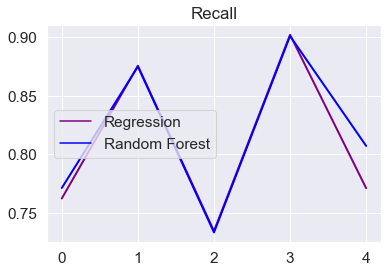

unbalanced random forest average precision: 0.891982
balanced regression average precision: 0.871284


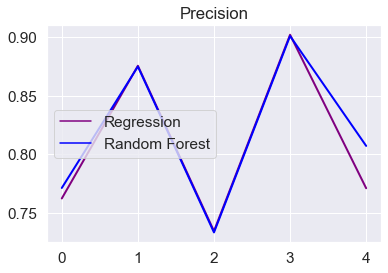

random forest recall: 0.826446
random forest precision: 0.990099


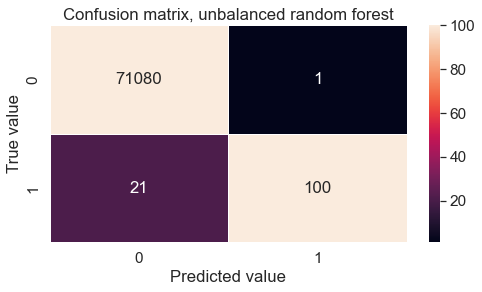

regression recall: 0.818182
regression precision: 0.883929


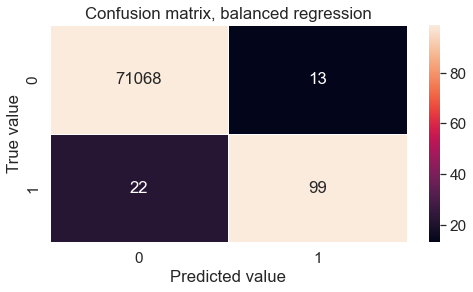

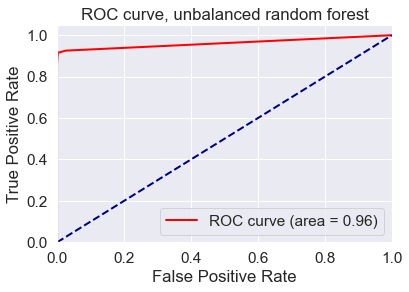

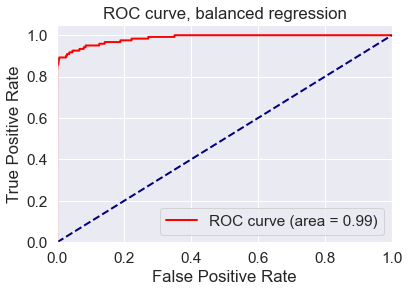

In [9]:
from sklearn.model_selection import train_test_split



cv = StratifiedKFold(n_splits=5)
florscores = []
regrscores = []
florrec = []
regrrec = []
florprec = []
regrprec = []

for i, (train, test) in enumerate(cv.split(X, y)):
    X_train = scale_columns(X.values[train])
    y_train = y.values[train]
    X_test = scale_columns(X.values[test])
    y_test = y.values[test]
        
    #floresta não balanceada:
    florun.fit(X_train, y_train)
    y_hat = florun.predict(X_test)
    florscores.append(f1_score(y_test, y_hat, average='binary', zero_division = 0))
    florrec.append(recall_score(y_test, y_hat))
    florprec.append(precision_score(y_test, y_hat, average='binary'))
    #regressão balanceada:
    bestregr.fit(X_train, y_train)
    y_hat = bestregr.predict(X_test)
    regrscores.append(f1_score(y_test, y_hat, average='binary', zero_division = 0))
    regrrec.append(recall_score(y_test, y_hat))
    regrprec.append(precision_score(y_test, y_hat, average='binary'))
    
print("unbalanced random forest F1 score average: %f" % np.average(florscores))
print("balanced regression F1 score average: %f" % np.average(regrscores))
plot_scores(regrscores, florscores, 'F1 scores', 'Regression', 'Random Forest')

print("unbalanced random forest average recall: %f" % np.average(florrec))
print("balanced regression average recall: %f" % np.average(regrrec))
plot_scores(regrscores, florscores, 'Recall', 'Regression', 'Random Forest')

print("unbalanced random forest average precision: %f" % np.average(florprec))
print("balanced regression average precision: %f" % np.average(regrprec))
plot_scores(regrscores, florscores, 'Precision', 'Regression', 'Random Forest')

#evaluating with one more split

X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train = scale_columns(X_train.values)
X_test = scale_columns(X_test.values)

y_train = y_train.values
y_test = y_test.values

florun.fit(X_train, y_train)
bestregr.fit(X_train, y_train)

y_hat = florun.predict(X_test)
print("random forest recall: %f" % recall_score(y_test, y_hat))
print("random forest precision: %f" % precision_score(y_test, y_hat))
plot_confusion_matrix(y_test, y_hat, classes=[0,1], title = ("Confusion matrix, unbalanced random forest"))
y_hat = bestregr.predict(X_test)
print("regression recall: %f" % recall_score(y_test, y_hat))
print("regression precision: %f" % precision_score(y_test, y_hat))
plot_confusion_matrix(y_test, y_hat, classes=[0,1], title = ("Confusion matrix, balanced regression"))

y_prob = florun.predict_proba(X_test)
plot_roc_curve(y_test, y_prob[:,1], title = "ROC curve, unbalanced random forest")
y_prob = bestregr.predict_proba(X_test)
plot_roc_curve(y_test, y_prob[:,1], title = "ROC curve, balanced regression")

#### Os resultados foram supreendentemente próximos. O modelo de floresta aleatória teve resultados marginalmente melhores.
### Tempo de execução:
#### Um aspecto prático que é bom ser avaliado é quanto tempo demora para rodar uma previsão com o modelo. O modelo de floresta aleatória com certeza vai demorar mais, mas quero ver quanto.

In [10]:
import time
i = 0
times = []
while (i<50):
    start_time = time.time()
    y_hat = florun.predict(X_test)
    times.append(time.time() - start_time)
    i += 1
print("average random forest prediction execution time: %f seconds" % np.average(times))

average random forest prediction execution time: 0.731696 seconds


In [11]:
i = 0
times = []
while (i<50):
    start_time = time.time()
    y_hat = bestregr.predict(X_test)
    times.append(time.time() - start_time)
    i += 1
print("average logistic regression prediction execution time: %f seconds" % np.average(times))

average logistic regression prediction execution time: 0.004043 seconds


#### Há uma diferença de umas 285 vezes no tempo que os modelos demoram para rodar. 0.4 segundos pode não parecer muito tempo, mas são efetuadas milhões de transações por dia. Só de rodar 50 vezes nas células acima já dá para notar a diferença no tempo de execução. Eu não sei como é a engenharia por trás do processamento de transações de cartão de crédito, e isso é uma questão de implementação, mas acho possível que o tempo de execução ~285 vezes menor do modelo de regressão logística faça diferença em uma eventual implementação. Vendo por esse ângulo eu ficaria com o modelo de regressão logística.

In [12]:
print (bestregr.get_params())
bestregr.coef_

{'C': 1e-07, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


array([[ 2.30883422e-09, -1.05291040e-02,  9.29015207e-03,
        -1.83706299e-02,  1.49357793e-02, -5.98930136e-03,
        -4.13108556e-03, -1.18919093e-02,  6.77102489e-04,
        -7.29872929e-03, -1.58447145e-02,  1.16918247e-02,
        -1.87795079e-02, -6.24775316e-04, -2.34670252e-02,
        -2.74843201e-04, -1.13254658e-02, -1.71328313e-02,
        -5.11876728e-03,  1.59235857e-03,  9.95472977e-04,
         2.67292919e-03,  1.06919721e-04, -4.73452140e-05,
        -4.06337787e-04,  2.45391767e-04,  2.13070781e-04,
         7.78066733e-04,  4.99568287e-04, -3.55174337e-09]])